# Regresja liniowa
Poniższy kod przedstawia szablon implementacji regresji liniowej dla jednej zmiennej

## Zadanie 1
Uzupełnij listę `predicted_prices` tak, aby dla każdego metrazu budynku z listy `sizes` wyznaczyć cenę tegoż budynku przy użyciu aktualnych wag modelu liniowego. Wykorzystaj `weight0` jako wyraz wolny, a `weight1` jako wagę cechy.

## Zadanie 2
Napisz kod, który iteracyjnie poprawiać będzie wagi tak, aby ostatecznie wyznaczyły prostą, która najlepiej odwzoru je zależność metraż -> cena. Wykorzystaj algorytm spadku gradientowego (patrz [Laboratoria1.pdf](Laboratoria1.pdf)).

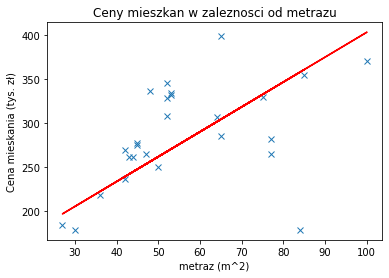

Wyznaczone wartości wag -> w0: [120.98628676] w1: [2.82087796]


In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.datasets.samples_generator import make_regression # for old sklearn version
from sklearn.datasets import make_regression # for new sklearn version
%matplotlib inline

sizes = np.loadtxt('flat.areas').reshape((26,1)) #załaduj wektor rozmiarów mieszkań
prices = np.loadtxt('flat.prices').reshape((26,1)) #załaduj wektor cen mieszkań
samples_cnt = len(prices) #pobierz liczność par rozmiar->cena
weight0 = 0.0 # inicjalizuj wagi
weight1 = 0.0 #
learning_rate = 0.0001 #stala uczenia
maxIteration = 100000 #liczba iteracji

for i in range(maxIteration):        
    predicted_prices = [weight1 * area + weight0 for area in sizes]    # zadanie 1
    
    sum_a = sum_b = 0  #zadanie 2
    for j in range(samples_cnt):
        diff = weight1 * sizes[j] + weight0 - prices[j]
        sum_a += diff * sizes[j]
        sum_b += diff
    
    weight1 = weight1 - learning_rate * 1 / samples_cnt * sum_a
    weight0 = weight0 - learning_rate * 1 / samples_cnt * sum_b 
    
plt.plot(sizes, prices, "x")
if len(predicted_prices) > 0:
    plt.plot(sizes, predicted_prices, "r-")
plt.title('Ceny mieszkan w zaleznosci od metrazu')
plt.xlabel('metraz (m^2)')
plt.ylabel('Cena mieskania (tys. zł)')
plt.show()
print("Wyznaczone wartości wag -> w0:", weight0, "w1:", weight1)

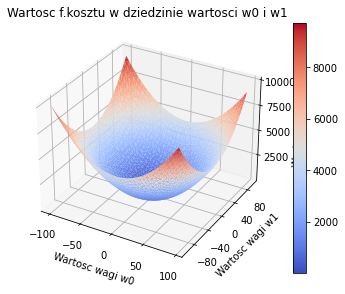

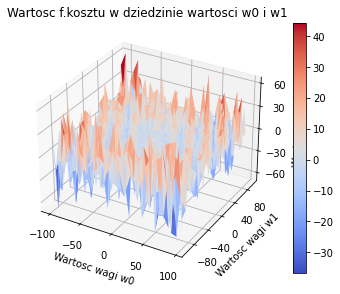

In [8]:
from helpers import visualize_cost_function
import numpy as np

def loss_function(sizes, prices, weight0, weight1):
    predictions = [weight0 + weight1*sizes[i] for i in range(len(prices))]
    return sum([(predictions[i] - prices[i])**2 for i in range(len(prices))])/(2*len(prices))


def loss_function2(sizes, prices, weight0, weight1):
    predictions = [weight0 + weight1*sizes[i] for i in range(len(prices))]
    return sum([(np.sin(predictions[i]/prices[i]**2) * (predictions[i]*prices[i]**3)) for i in range(len(prices))])/(2*len(prices))


#Poniższy kod wyznacza wartości funkcji kosztu w dziedzinie wartości atrybutów w0 i w1
w0_values = np.arange(-10, 10, 0.5)
w1_values = np.arange(-10, 10, 0.5)

sizes_transformed = ((sizes - np.mean(sizes)) / np.std(sizes)).reshape(-1)
prices_transformed = ((prices - np.mean(prices)) / np.std(prices)).reshape(-1)

w0_values = np.arange(-100, 100, 5)
w1_values = np.arange(-100, 100, 5)

visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function)
visualize_cost_function(sizes_transformed, prices_transformed, w0_values, w1_values, loss_function2)

## Zadanie 3
Po wykonaniu tego fragmentu kodu zobaczysz wizualizacje dwóch różnych funkcji kosztu. 
Pierwsza z nich obrazuje błąd średniokwadratowy, druga - jakąś arbitralnie wybraną funkcję
Zastanów się, dlaczego używa się często tej pierwszej w procesie uczenia spadkiem gradientowym, a nie tej drugiej?

**W procesie uczenia spadkiem gradientowym używa się pierwszej funkcji, gdyż nie wprowadza ona minimów lokalnych, posiada za to jedno minimum globalne, do którego można dążyć.**

Co sprawia, że funkcja kosztu jest dobra?

**Różniczkowalność oraz gdy w miarę możliwości nie wprowadza minimów lokalnych.**

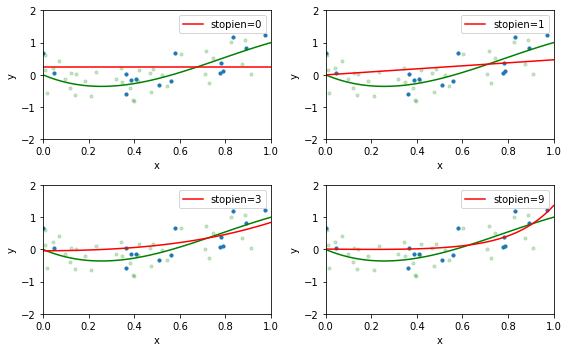

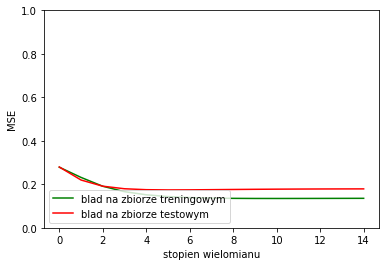

In [10]:
#regresja wielomianowa

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split # model_selection w starszych wersjach -> cross_validation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#funkcja, ktora chcemy aproksymowac
def f(x): 
	return -(3*x)+(7*x**2)-(3*x**3)

x = np.linspace(0,1,100) #Stworzenie przestrzeni w której będziemy wizualizować aproksymowaną funkcję (x od 0 do 1 z krokiem 1/100)

X = np.random.uniform(0, 1, size=50)[:, np.newaxis] #Wylosowanie przykladow (os X)
y = f(X) + np.random.normal(scale=0.3, size=50)[:, np.newaxis] #Wygenerowanie punktów zgodnie z funkcją f(x) z uwzględnieniem szumu

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7) #Podzial danych na zbior treningowy i testowy


#Pomocnicza funkcja do wizualizacji
def plot_approximation(est, ax, label=None):
    ax.plot(x, f(x), color='green')
    ax.scatter(X_train, y_train, s=10) #Dodanie punktow zbioru treningowego do wizualizacji
    ax.scatter(X_test, y_test, s=10, color='green', alpha=0.2) #Dodanie punktow zbioru testowego do wizualizacji
    ax.plot(x, est.predict(x[:, np.newaxis]), color='red', label=label) #Wizualizacja wygenerowanej funkcji
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right')

#Uzycie sklearn do wygenerowania regresji wielomianowej stopnia 0,1,3,9
fig, axes = plt.subplots(2, 2, figsize=(8, 5))
for ax, degree in zip(axes.ravel(), [0, 1, 3, 9]):
    est = make_pipeline(PolynomialFeatures(degree), Ridge())
    est.fit(X_train, y_train)
    plot_approximation(est, ax, label='stopien=%d' % degree)
plt.tight_layout()
plt.show()


#Uzycie sklearn do wygenerowania regresji wielomianowej stopnia 0..15, w celu weryfikacji bledu na zbiorach uczacym i testowym
train_error = np.empty(15)
test_error = np.empty(15)
for degree in range(15):
    est = make_pipeline(PolynomialFeatures(degree), Ridge()) #Zdefiniowanie typu modelu
    est.fit(X_train, y_train)  #Uczenie parametrów
    train_error[degree] = mean_squared_error(y_train, est.predict(X_train)) #Zapisanie bledu zb. uczacego dla zadanego stopnia wielomianu
    test_error[degree] = mean_squared_error(y_test, est.predict(X_test)) #Zapisanie bledu zb. testowego dla zadanego stopnia wielomianu
    
    
#Wizualizacja bledu. Odpowiednio na zbiorze uczacym i testowym
plt.plot(np.arange(15), train_error, color='green', label='blad na zbiorze treningowym')
plt.plot(np.arange(15), test_error, color='red', label='blad na zbiorze testowym')
plt.legend(loc = 'upper right')
plt.ylim((0.0, 1e0))
plt.ylabel('MSE')
plt.xlabel('stopien wielomianu')
plt.legend(loc='lower left')
plt.show()

## Zadanie 4
Zastanow sie dlaczego powyzej pewnego stopnia wielomianu blad na zbiorze testowym staje sie coraz wiekszy?

**Dochodzi do przeuczenia - stanu, w którym model uczy się szumu z danych.**

Po co wprowadza się zbiór testowy?

**Aby sprawdzić skuteczność nauczonego modelu. Zbiór testowy reprezentuje dane, o których model nie ma żadnych informacji. Na podstawie wyników uzyskanych na zbiorze treningowym i testowym możemy ocenić czy model jest wystarczająco wytrenowany lub przetrenowany.**

## Zadanie 5
Podmieniając `LinearRegression` przez `Ridge`, sprawdź jaki wpływ ma regularyzacja na błąd testowy. 
Zaobserwuj różnicę w wyglądzie wygenerowanej krzywej. Opisz różnicę, wyjaśnij jej powody i skomentuj czy zmiana jest pozytywna czy negatywna.

**Różnica polega na braku/minimalizacji zjawiska przeuczenia się. Powodem tego jest wprowadzenie dodatkowej kary za duże wartości wyuczonych wag, przez co funkcja staje się lepiej dopasowana do rzeczywistego trendu danych. Zmiana jest pozytywna ponieważ nie zależy nam na przeuczeniu modelu, zależy nam na jak najlepszym przewidywaniu wyniku.**